In [1336]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [1337]:
train_df=pd.read_csv('/Users/shrutisekhar/Desktop/icg project/datasets/Train copy.csv') 
train_df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,Home,Away,Second,First,Dec,4
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1
2,9,15,47,9,Home,Away,First,Second,Feb,9
3,7,2,102,6,Home,Away,First,Second,Aug,2
4,6,8,46,5,Home,Away,First,Second,Aug,6


In [1338]:
train_df['MonthOfMatch'].unique()

array(['Dec', 'Sep', 'Feb', 'Aug', 'Nov', 'May', 'Jan', 'Jun', 'Apr',
       'Oct', 'Mar', 'Jul'], dtype=object)

In [1339]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team1          2508 non-null   int64 
 1   Team2          2508 non-null   int64 
 2   Stadium        2508 non-null   int64 
 3   HostCountry    2508 non-null   int64 
 4   Team1_Venue    2508 non-null   object
 5   Team2_Venue    2508 non-null   object
 6   Team1_Innings  2508 non-null   object
 7   Team2_Innings  2508 non-null   object
 8   MonthOfMatch   2508 non-null   object
 9   MatchWinner    2508 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 196.1+ KB


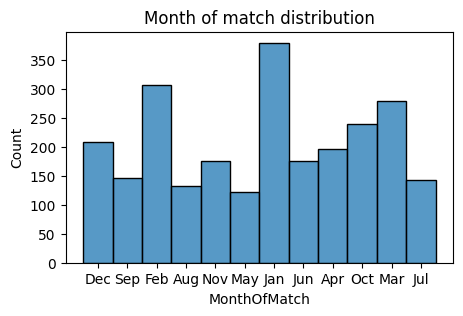

In [1340]:
plt.figure(figsize=(5, 3))
sns.histplot(train_df['MonthOfMatch'])
plt.title('Month of match distribution')
plt.show()


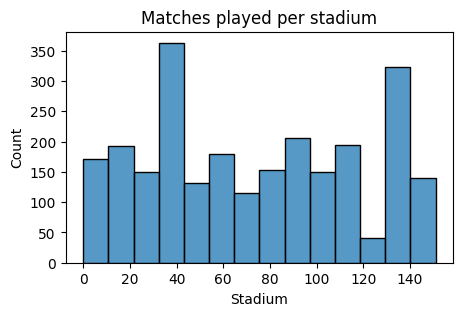

In [1341]:
plt.figure(figsize=(5, 3))
sns.histplot(train_df['Stadium'])
plt.title('Matches played per stadium')
plt.show()

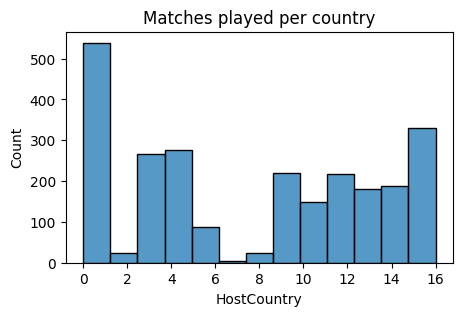

In [1342]:
plt.figure(figsize=(5, 3))
sns.histplot(train_df['HostCountry'])
plt.title('Matches played per country')
plt.show()

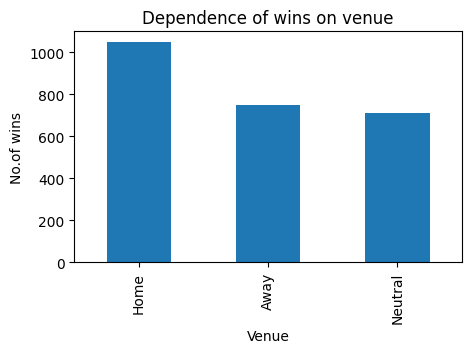

In [1343]:
#plotting dependence of wins on venue
team1_wins = train_df[train_df['MatchWinner'] == train_df['Team1']]
team2_wins = train_df[train_df['MatchWinner'] == train_df['Team2']]

venue_win = team1_wins['Team1_Venue']
t2_venue_wins=team2_wins['Team2_Venue']  

venue_win = team1_wins[['Team1_Venue']].rename(columns={'Team1_Venue': 'Venue'})
t2_venue_wins = team2_wins[['Team2_Venue']].rename(columns={'Team2_Venue': 'Venue'}) 

concatenated_df = pd.concat([venue_win, t2_venue_wins], axis=0)  

plt.figure(figsize=(5, 3))  
counts=concatenated_df['Venue'].value_counts()
counts.plot(kind='bar') 
plt.xlabel('Venue')
plt.ylabel('No.of wins')
plt.title('Dependence of wins on venue')
plt.show()


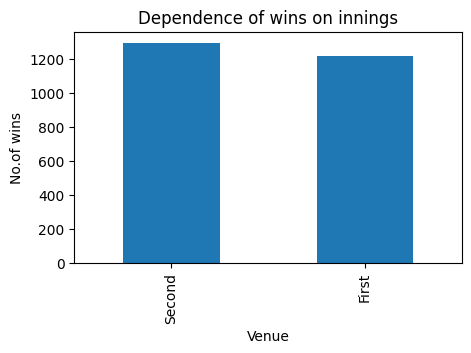

In [1344]:
#plotting dependence of wins on innings
team1_wins = train_df[train_df['MatchWinner'] == train_df['Team1']]
team2_wins = train_df[train_df['MatchWinner'] == train_df['Team2']]

innings_win = team1_wins['Team1_Innings']
t2_venue_wins=team2_wins['Team2_Innings']  

innings_win = team1_wins[['Team1_Innings']].rename(columns={'Team1_Innings': 'Innings'})
t2_innings_wins = team2_wins[['Team2_Innings']].rename(columns={'Team2_Innings': 'Innings'}) 

concatenated_df = pd.concat([innings_win, t2_innings_wins], axis=0)  

plt.figure(figsize=(5, 3))  
counts=concatenated_df['Innings'].value_counts()
counts.plot(kind='bar') 
plt.xlabel('Venue')
plt.ylabel('No.of wins')
plt.title('Dependence of wins on innings')
plt.show()

In [1345]:
#one hot encoding the venue,innings and month of match column 
def encoder(train_df):  
    from sklearn.preprocessing import LabelEncoder 
    team1_venue_encoder = LabelEncoder() 
    team2_venue_encoder = LabelEncoder() 
    team1_innings_encoder = LabelEncoder()
    team2_innings_encoder = LabelEncoder()  
    month_encoder=LabelEncoder()
   
    train_df['Team1_Venue'] = team1_venue_encoder.fit_transform(train_df['Team1_Venue']) 
    train_df['Team2_Venue'] = team2_venue_encoder.fit_transform(train_df['Team2_Venue']) 
    train_df['Team1_Innings'] = team1_innings_encoder.fit_transform(train_df['Team1_Innings']) 
    train_df['Team2_Innings'] = team2_innings_encoder.fit_transform(train_df['Team2_Innings'])  
    train_df['MonthOfMatch']=month_encoder.fit_transform(train_df['MonthOfMatch']) 

    return train_df

    


train_df=encoder(train_df) 
train_df.head()



,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,1,0,1,0,2,4
1,1,14,84,7,2,2,0,1,11,1
2,9,15,47,9,1,0,0,1,3,9
3,7,2,102,6,1,0,0,1,1,2
4,6,8,46,5,1,0,0,1,1,6


In [1346]:
#dropping Stadium,HostCountry,Team1_Innings,Team2_innings,MonthOfMatch as the outcome of the match does not show a dependence on these factors 
train_df=train_df.drop(columns=['Stadium','HostCountry','Team1_Innings','Team2_Innings','MonthOfMatch'])

In [1347]:
#0 if team1 wins, 1 if team2 wins
train_df['MatchWinner']=train_df.apply(lambda x:int(x['MatchWinner']==x['Team2']),axis=1)

In [1348]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_df[['Team1_Venue','Team2_Venue']]=scaler.fit_transform(train_df[['Team1_Venue','Team2_Venue']])
train_df.head()

,Team1,Team2,Team1_Venue,Team2_Venue,MatchWinner
0,5,4,-0.626549,-0.628860,1
1,1,14,1.589792,1.590959,0
2,9,15,-0.626549,-0.628860,0
3,7,2,-0.626549,-0.628860,1
4,6,8,-0.626549,-0.628860,0


In [1349]:
train_df.head()

,Team1,Team2,Team1_Venue,Team2_Venue,MatchWinner
0,5,4,-0.626549,-0.628860,1
1,1,14,1.589792,1.590959,0
2,9,15,-0.626549,-0.628860,0
3,7,2,-0.626549,-0.628860,1
4,6,8,-0.626549,-0.628860,0


In [1350]:
#splitting the data into x and y
y=train_df['MatchWinner']  
x=train_df.drop(columns=['MatchWinner']) 


In [1351]:
print(np.shape(x) )
y=np.expand_dims(y,-1)
print(np.shape(y))

(2508, 4)
(2508, 1)


In [1352]:
print(np.unique(y,return_counts=True))

(array([0, 1]), array([1434, 1074]))


In [1353]:
from sklearn.model_selection import train_test_split 
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [1354]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model=Sequential([

        Dense(32,activation='relu',input_shape=[4], kernel_regularizer=l2(0.001)),  
        BatchNormalization(),
        Dense(64,activation='relu', kernel_regularizer=l2(0.001)), 
        Dropout(0.3), 
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1,activation='sigmoid'),
])
model.summary()


/Users/shrutisekhar/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_188 (Dense)               │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,625 (25.88 KB)

 Trainable params: 6,561 (25.63 KB)

 Non-trainable params: 64 (256.00 B)

In [1355]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [1356]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True) 


In [1357]:
history=model.fit(x_train,y_train,epochs=150,validation_data=(x_val,y_val),callbacks=[early_stopping])

Epoch 1/150


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4802 - loss: 0.8631 - val_accuracy: 0.5398 - val_loss: 0.8000
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4920 - loss: 0.8545 - val_accuracy: 0.5478 - val_loss: 0.7993
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5114 - loss: 0.8360 - val_accuracy: 0.5538 - val_loss: 0.7967
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5294 - loss: 0.8213 - val_accuracy: 0.5677 - val_loss: 0.7945
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5204 - loss: 0.8230 - val_accuracy: 0.5677 - val_loss: 0.7935
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5515 - loss: 0.8108 - val_accuracy: 0.5677 - val_loss: 0.7920
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5318 - loss: 0.8087 - val_accuracy: 0.5677 - val_loss: 0.7905
Epoch 8/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5344 - loss: 0.8149 - val_accuracy: 0.5677 - val_loss: 0.7

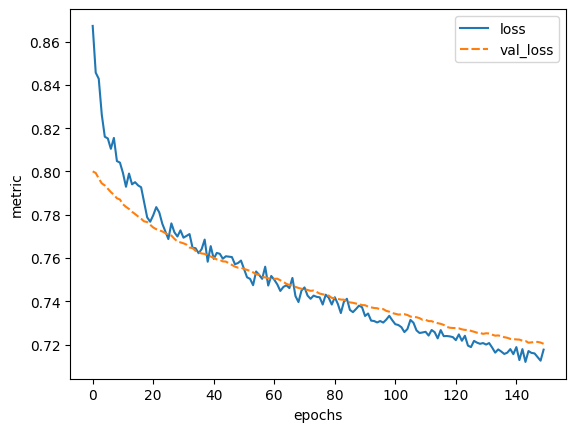

In [1358]:
import seaborn as sns
def plot_history(history, metrics):
    
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metric")
plot_history(history, ['loss', 'val_loss']) 


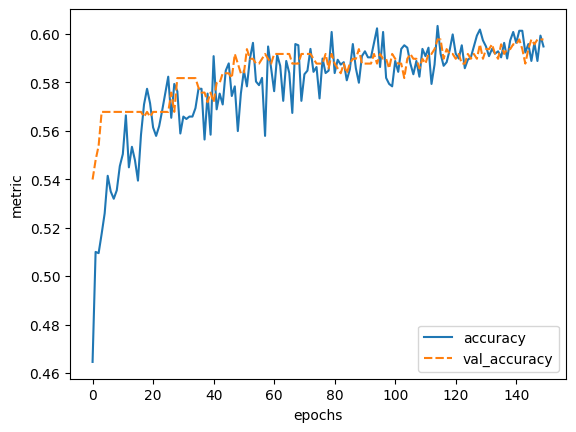

In [1359]:
plot_history(history,['accuracy','val_accuracy'])

In [1360]:
y_predicted=model.predict(x_train)  
y_predicted=(y_predicted>0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step


In [1361]:
y_predicted_val=model.predict(x_val)  
y_predicted_val=(y_predicted_val>0.5).astype(int)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


In [1362]:
#classification report data for train data 
from sklearn.metrics import classification_report 
print(classification_report(y_train, y_predicted))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73      1149
           1       0.64      0.27      0.38       857

    accuracy                           0.62      2006
   macro avg       0.63      0.58      0.55      2006
weighted avg       0.63      0.62      0.58      2006



In [1363]:
#classification report for validation data
from sklearn.metrics import classification_report 
print(classification_report(y_val, y_predicted_val))

              precision    recall  f1-score   support

           0       0.60      0.88      0.71       285
           1       0.59      0.22      0.32       217

    accuracy                           0.60       502
   macro avg       0.60      0.55      0.52       502
weighted avg       0.60      0.60      0.54       502

